# Avocado (Evaluation Project - 3)

Problem Statement:
    
Avocado is a fruit consumed by people heavily in the United States.

Content:
    
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV.

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados.

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags.

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Aim
Your task is to make a mode that can consider the data provided and predict the Average Price.

In [1]:
# import some necssary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Let's import the dataset

avocado_data = pd.read_csv("avocado.csv")
avocado_data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [3]:
# Let's drop the 2 columns which is not important for model

avocado_data.drop(columns = ["Unnamed: 0", "Date"], axis=1, inplace=True)
avocado_data.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


It seems that maximul number of avacodo's sold with PLU 4225

In [4]:
# Count the zero values present in the dataset if any..

for column in avocado_data:
    print(column+"= "+str(avocado_data[avocado_data[column]==0].shape[0]))

AveragePrice= 0
Total Volume= 0
4046= 242
4225= 61
4770= 5497
Total Bags= 15
Small Bags= 159
Large Bags= 2370
XLarge Bags= 12048
type= 0
year= 0
region= 0


In [5]:
# Quick information about dataset in detail

avocado_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


Our Target column is "AveragePrice". There are 2 categorical columns.

In [6]:
# Let's check the null values

avocado_data.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

There is no null values at all

In [7]:
# Let's check the value count of each column

for column in avocado_data:
    print(avocado_data[column].value_counts())

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: 4225, Length: 18103, dtype: int64
0.00      5497
2.66         7
3.32         7
10.97        6
1.59         6
          ... 
547.08       1
155.87       1
72.01        1
128.06       1
224.53       1
Name: 4770, 

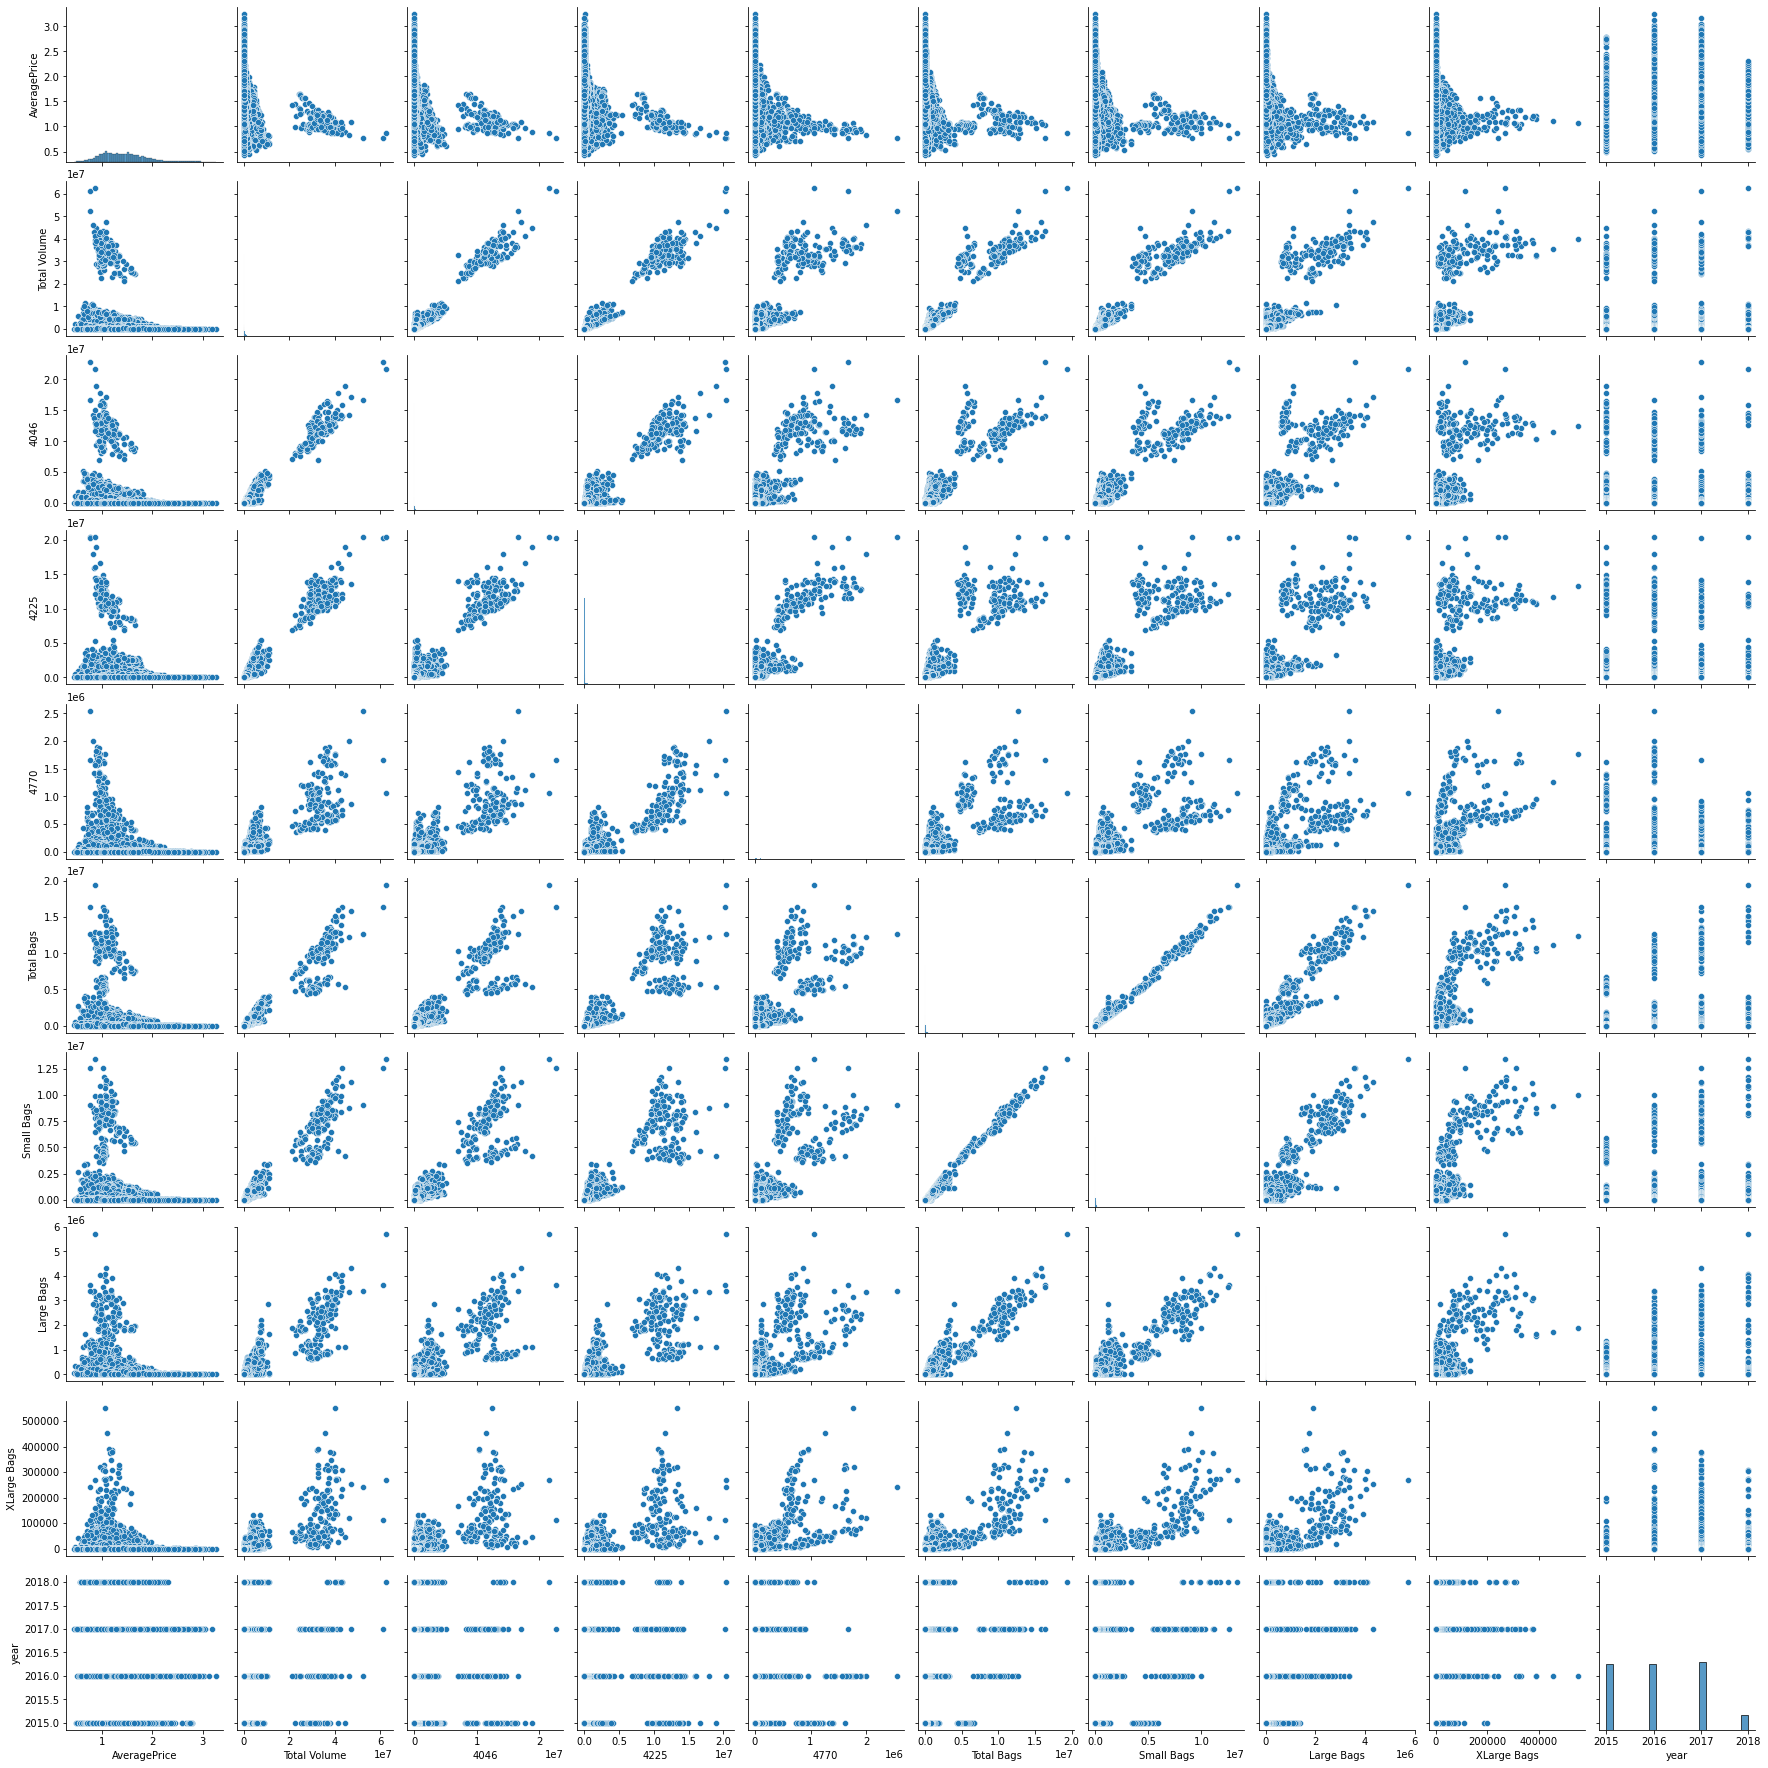

In [8]:
# Let's plot pairplot

sns.pairplot(avocado_data)

The pairplot is not looking good. Let's explore the data one by one

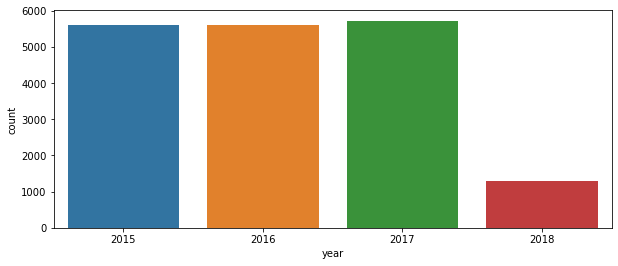

In [9]:
# Years count

plt.figure(figsize=(10,4))
sns.countplot(x="year", data=avocado_data)
plt.show()

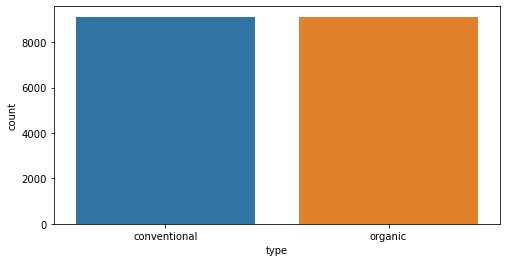

In [10]:
# Type Counts

plt.figure(figsize=(8,4))
sns.countplot(x="type", data=avocado_data)
plt.show()

There are only 2 types of avocado are available

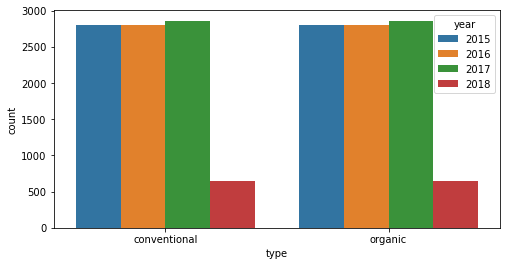

In [11]:
# How type of avocado sale is related to the years

plt.figure(figsize=(8,4))
sns.countplot(x='type', data=avocado_data, hue="year")
plt.show()

convential and organic are contributed equal data to the years

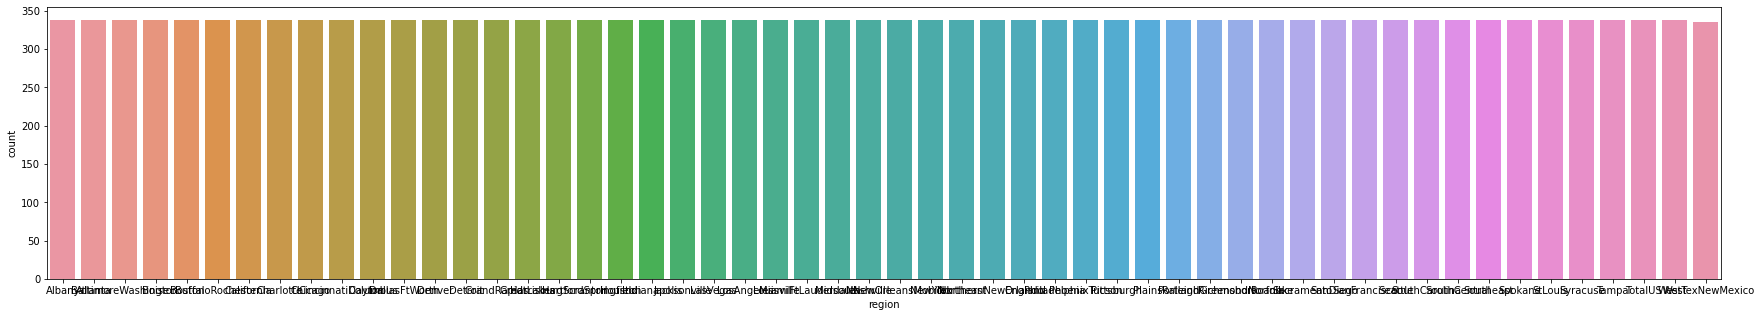

In [12]:
# Region

plt.figure(figsize=(30,5))
sns.countplot(x='region', data=avocado_data)
plt.show()

It seems that all regions have equal data. as we seen in the value counts

<AxesSubplot:xlabel='year', ylabel='Total Volume'>

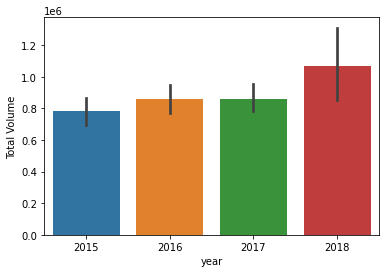

In [13]:
# Let's check how many volume covered by each year

sns.barplot(x="year", y="Total Volume", data=avocado_data)

Maximum Total Volume covered by years 2018 and others have approx same volume

<AxesSubplot:xlabel='type', ylabel='Total Volume'>

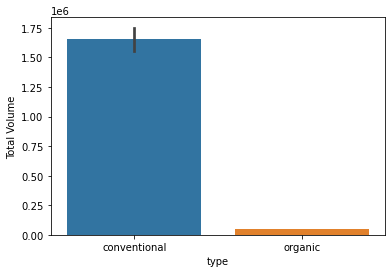

In [14]:
# Let's check how many volume cover by type

sns.barplot(x="type", y="Total Volume", data=avocado_data)

It seems that maximum volume covered by conventinal and organic has very less amount of volume

<AxesSubplot:xlabel='year', ylabel='AveragePrice'>

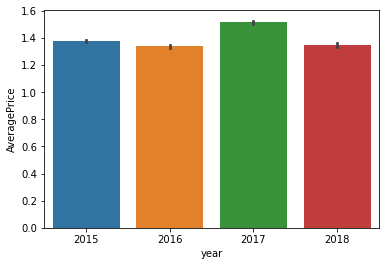

In [15]:
# Years wise average price or avocado's

sns.barplot(x="year", y="AveragePrice", data=avocado_data)

No major any change in Year wise Average Price

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

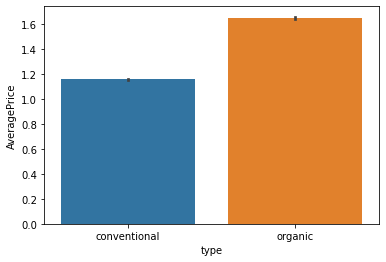

In [16]:
# Type wise average price of avocado's

sns.barplot(x="type", y="AveragePrice", data=avocado_data)

Organic avocado's has high Average Price means Organic is giving the high profit but according to the above observation that Organic sales is very less.

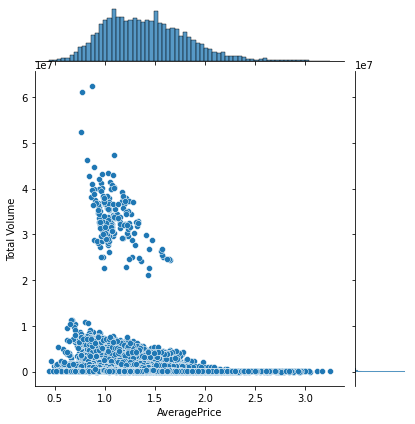

In [17]:
# Average Price vs Total Volume

sns.jointplot(x=avocado_data["AveragePrice"], y=avocado_data["Total Volume"])

It seems that with less Average Price, Volume increased.

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

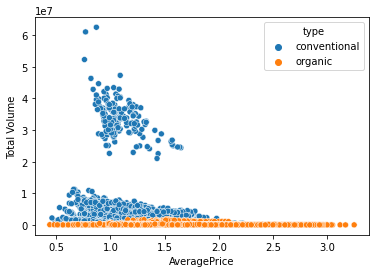

In [18]:
#Impact of type on  Average Price vs Total Volume

sns.scatterplot(x="AveragePrice", y="Total Volume", data=avocado_data, hue="type")

Organic is giving the huge impact on AveragePrice than Total Volume.

<AxesSubplot:xlabel='AveragePrice', ylabel='Total Volume'>

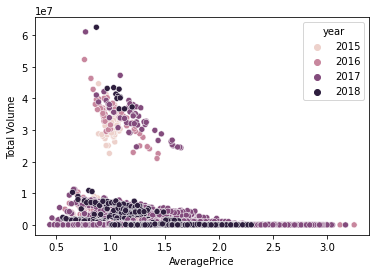

In [19]:
# Impact of year on  Average Price vs Total Volume

sns.scatterplot(x="AveragePrice", y="Total Volume", data=avocado_data, hue="year")

not more impace when average price incrases but 2018 giving the high impact with respect to the Total volums.

In [20]:
# Let's check the correlation matrix

corr = avocado_data.corr()
corr

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


<AxesSubplot:>

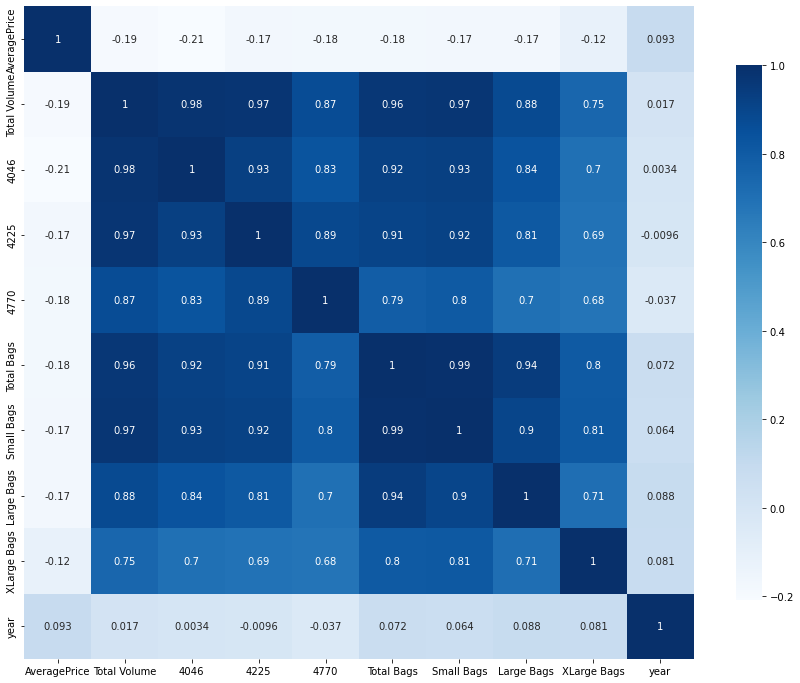

In [21]:
# Let's visualize the heatmap for more cleareance

plt.figure(figsize=(15,12))
sns.heatmap(corr, cbar=True, annot=True, cbar_kws={"shrink": .82}, annot_kws={"size" : 10}, cmap="Blues",
           fmt=".2g")

In [22]:
# Let's drop the Total Volumn and Total Bags because : 

# Total Volume is the total of all inputs and Total Bags is the sum of all Bags

avocado_data.drop(columns = ["Total Volume", "Total Bags"], axis=1, inplace=True)

In [23]:
# Let's check the zero counts if any in the dataset....

for column in avocado_data:
    print(column+ " = "+str(avocado_data[avocado_data[column]==0].shape[0]))
print("\nShape of the Dataset : ",avocado_data.shape)

AveragePrice = 0
4046 = 242
4225 = 61
4770 = 5497
Small Bags = 159
Large Bags = 2370
XLarge Bags = 12048
type = 0
year = 0
region = 0

Shape of the Dataset :  (18249, 10)


Now look at the XLarge Bags, it has 66% has zero values. So, we can't go with it and we have to drop it.

And in others columns we can left with them because zero means no sale and it can be possible...

In [24]:
# Let's drop the column XLarge Bags

avocado_data.drop(columns = ["XLarge Bags"], axis=1, inplace=True)

In [25]:
# Let' separate the input and output 

x = avocado_data.drop(columns = ["AveragePrice"], axis=1)
y = avocado_data["AveragePrice"]

In [26]:
# Let's check the skewness

x.skew()

4046           8.648220
4225           8.942466
4770          10.159396
Small Bags     9.540660
Large Bags     9.796455
year           0.215339
dtype: float64

The dataset has huge skewness. need to  remove it...

In [27]:
# Let's remove the skewness:

for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index] = np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index] = np.square(x[index])

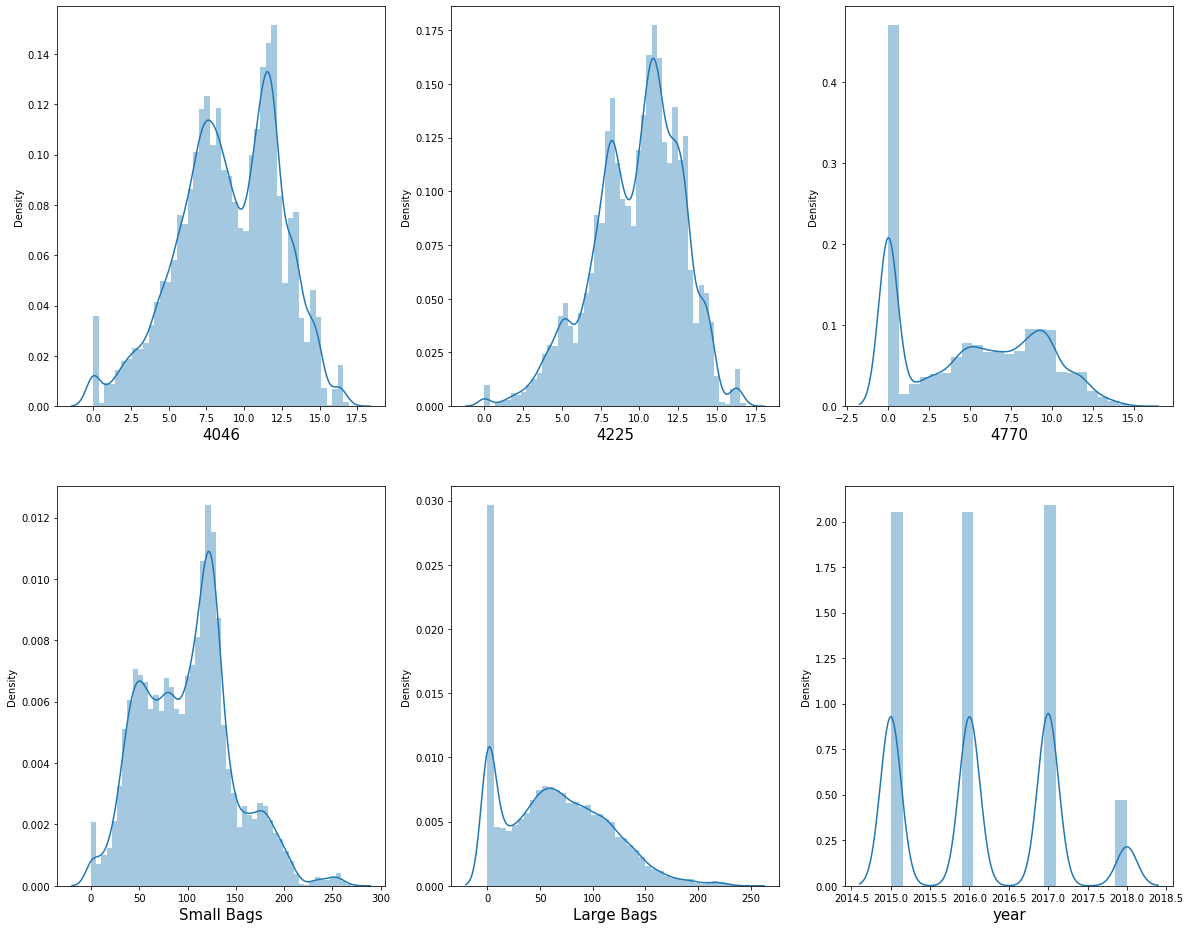

In [29]:
 #Let's check the distplot

numerical_column = x.drop(columns= ["type", "region"])

plt.figure(figsize = (20,25), facecolor='white')
graphplot = 1
for column in numerical_column:
    if graphplot <=9:
        ax=plt.subplot(3,3,graphplot)
        sns.distplot(numerical_column[column])
        plt.xlabel(column,fontsize=15)
    graphplot+=1
plt.show()

In [30]:
# Let's check the skewness again

x.skew()

4046         -0.328195
4225         -0.486654
4770          0.099986
Small Bags    0.312461
Large Bags    0.451293
year          0.215339
dtype: float64

All column skewness has been fix. Let's to with One Hot Encoding...

In [31]:
# Let's convert the categorical column to numerical column which is 2.

x = pd.get_dummies(avocado_data, drop_first=True)
x.head()

,AveragePrice,4046,4225,4770,Small Bags,Large Bags,year,type_organic,region_Atlanta,region_BaltimoreWashington,...,region_SouthCarolina,region_SouthCentral,region_Southeast,region_Spokane,region_StLouis,region_Syracuse,region_Tampa,region_TotalUS,region_West,region_WestTexNewMexico
0,1.33,1036.74,54454.85,48.16,8603.62,93.25,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.35,674.28,44638.81,58.33,9408.07,97.49,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.93,794.70,109149.67,130.50,8042.21,103.14,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.08,1132.00,71976.41,72.58,5677.40,133.76,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.28,941.48,43838.39,75.78,5986.26,197.69,2015,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Shape of the dataset after all calculation

x.shape

(18249, 61)

Number of component explaining 98% variance :  53


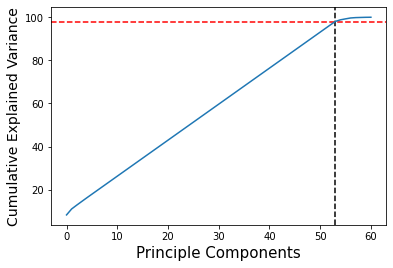

In [33]:
# Let's check the PCA technique because the dataset is large

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

x_pca = PCA()
x_pca.fit(x_scaled)

var_cumu = np.cumsum(x_pca.explained_variance_ratio_)*100
k = np.argmax(var_cumu>98)
print("Number of component explaining 98% variance : ",k)

plt.xlabel("Principle Components", fontsize=15)
plt.ylabel("Cumulative Explained Variance", fontsize=14)
plt.axvline(x=k, color='k', linestyle='--')
plt.axhline(y=98, color='r', linestyle='--')
plt.plot(var_cumu)
plt.show()

Only 53 features is giving the 98% variance. So, let's use the PCA

In [34]:
# PCA technique 

pca = PCA(n_components=53)
df_x = pca.fit_transform(x_scaled)
df_x

array([[-3.16521995e-01, -8.48898296e-01, -4.71245310e-01, ...,
         2.97496638e-13,  8.00285382e-02,  6.62816652e-01],
       [-3.25434285e-01, -8.15323230e-01, -4.70442090e-01, ...,
         3.04989271e-13,  8.00243986e-02,  6.62132624e-01],
       [-1.80794668e-01, -1.52689000e+00, -4.77610804e-01, ...,
         3.05962309e-13,  8.00868491e-02,  6.74490804e-01],
       ...,
       [-7.65791879e-01,  1.06147780e+00,  1.10984359e+00, ...,
         2.63362026e-11,  7.00024352e+00, -2.39731278e+00],
       [-7.82058033e-01,  1.16378437e+00,  1.11020427e+00, ...,
         2.63361228e-11,  7.00023547e+00, -2.39897108e+00],
       [-6.92820807e-01,  6.35962516e-01,  1.10926165e+00, ...,
         2.63360880e-11,  7.00027461e+00, -2.39049286e+00]])

In [47]:
# Let's import the necessary libraries for model buildings

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split, cross_val_score
from time import time

In [48]:
def bestmodel(model):
    max_score = 0
    max_state = 0
    start = time()
    for i in range(1,3):
        x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=20, random_state = i)
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        score = r2_score(y_test, y_pred)
        if score > max_score:
            max_score = score
            max_state = 1
    end = time()
    print("Best R2 Score corresponding to ",max_state," is : ", max_score)
    print("Cross Validation Score is : ",cross_val_score(model, df_x, y, cv=5, scoring='r2').mean())
    print("Time taken by model for prediction : {:.4f} seconds".format(end-start))

In [49]:
# Linear Regression 

from sklearn.linear_model import LinearRegression

LR = LinearRegression()
bestmodel(LR)

Best R2 Score corresponding to  1  is :  0.8943614374087162
Cross Validation Score is :  0.7392629856385767
Time taken by model for prediction : 0.1097 seconds


In [50]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
bestmodel(DTR)

Best R2 Score corresponding to  1  is :  0.9943849384230642
Cross Validation Score is :  0.7814897271410046
Time taken by model for prediction : 1.0582 seconds


In [51]:
# K-Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
bestmodel(KNR)

Best R2 Score corresponding to  1  is :  0.9987259944321238
Cross Validation Score is :  0.8580412726517157
Time taken by model for prediction : 0.1765 seconds


In [52]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
bestmodel(RFR)

Best R2 Score corresponding to  1  is :  0.998473562025197
Cross Validation Score is :  0.8700695279430724
Time taken by model for prediction : 69.1970 seconds


In [68]:
# Support Vector Regression

from sklearn.svm import LinearSVR

SVR = LinearSVR()
bestmodel(SVR)

Best R2 Score corresponding to  1  is :  0.8765214610719845
Cross Validation Score is :  0.7362802015281311
Time taken by model for prediction : 14.5056 seconds


After analyzing the R2_Scores and cross validation scores and the of 5 models. Now it is clear that Random Forest Regressor is giving the highest score. So, let's use the hyperparameter tuning with RFR and try to increase the score of it.

In [ ]:
# Final Model with Hyper-Parameter Tuning 


from sklearn.model_selection import GridSearchCV

param_grid = {"n_estimators" : [100,200],"criterion" : ["mse", "mae"],
              "min_samples_leaf" : [1,2,3], "min_samples_split" : [2,3,4]}

grid_search = GridSearchCV(RFR, param_grid)
grid_search.fit(x_train, y_train)


Final_Avocado_Model = RandomForestRegressor(n_estimators=100 , criterion="mse" , min_samples_leaf=1, min_samples_split=3)
x_train, x_test, y_train, y_test = train_test_split(df_x, y, test_size=20, random_state = 1)
Final_Avocado_Model.fit(x_train, y_train)
pred = Final_Avocado_Model.predict(x_test)
r2_score(y_test, pred) 

In [ ]:
# Saving the Final Model

import joblib

joblib.dump(Final_Avocado_Model,"Final_Avocado_Model.pkl")